In [4]:
import tensorflow as tf
import keras.preprocessing.image
from keras import utils
from keras.constraints import maxnorm
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist

In [5]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [6]:
import matplotlib.pyplot as plt

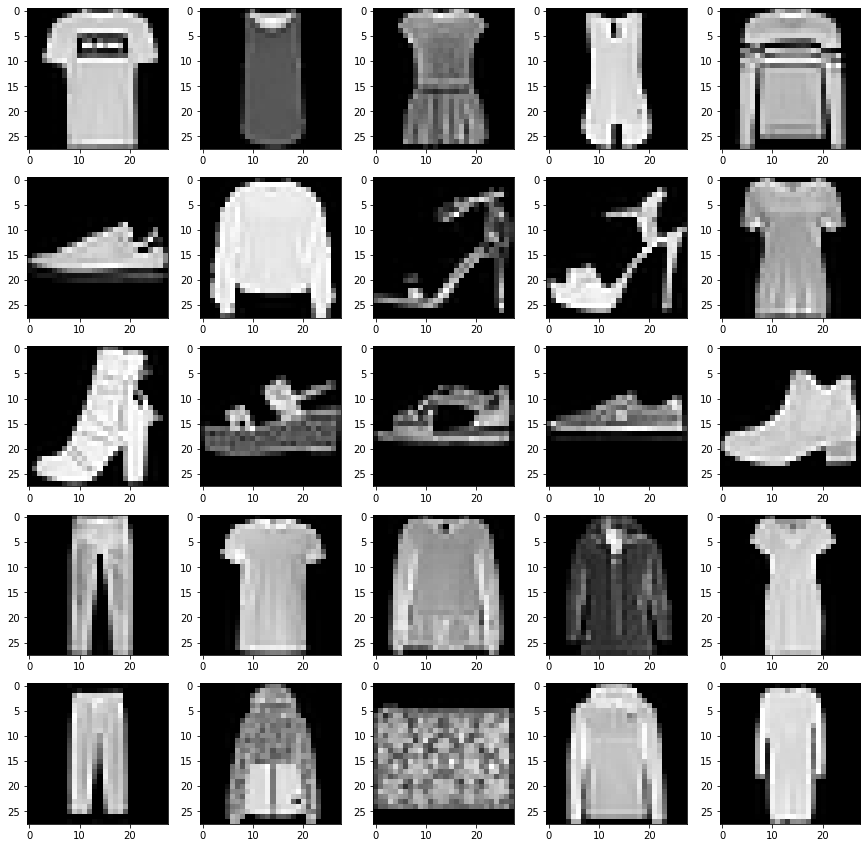

In [7]:
fig = plt.figure(figsize=(15, 15))
columns, rows = 5, 5

for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.cm.gray)

plt.show()


In [8]:
X_train.astype('float32')
X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Flatten(): converting Matrix to single array.
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# compile model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test))
print(model.summary())
scores = model.evaluate(X_test, Y_test, verbose=0)
scores

Epoch 1/30
469/469 [==============================] - 25s 54ms/step - loss: 0.6142 - accuracy: 0.7774 - val_loss: 0.4048 - val_accuracy: 0.8516
Epoch 2/30
469/469 [==============================] - 22s 48ms/step - loss: 0.4031 - accuracy: 0.8532 - val_loss: 0.3448 - val_accuracy: 0.8738
Epoch 3/30
469/469 [==============================] - 25s 52ms/step - loss: 0.3522 - accuracy: 0.8716 - val_loss: 0.3208 - val_accuracy: 0.8827
Epoch 4/30
469/469 [==============================] - 22s 48ms/step - loss: 0.3204 - accuracy: 0.8827 - val_loss: 0.3031 - val_accuracy: 0.8889
Epoch 5/30
469/469 [==============================] - 23s 48ms/step - loss: 0.3000 - accuracy: 0.8907 - val_loss: 0.2869 - val_accuracy: 0.8957
Epoch 6/30
469/469 [==============================] - 22s 48ms/step - loss: 0.2827 - accuracy: 0.8945 - val_loss: 0.2685 - val_accuracy: 0.8993
Epoch 7/30
469/469 [==============================] - 22s 47ms/step - loss: 0.2683 - accuracy: 0.9011 - val_loss: 0.2693 - val_accuracy:

[0.24453124403953552, 0.9158999919891357]

In [17]:
model.save('conv_test.model')

INFO:tensorflow:Assets written to: conv_test.model/assets


#	EXPERIMENTS

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Flatten(): converting Matrix to single array.
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# compile model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test))
print(model.summary())
scores2 = model.evaluate(X_test, Y_test, verbose=0)
scores2

Epoch 1/30
469/469 [==============================] - 27s 58ms/step - loss: 0.8901 - accuracy: 0.6684 - val_loss: 0.5796 - val_accuracy: 0.7947
Epoch 2/30
469/469 [==============================] - 27s 58ms/step - loss: 0.5967 - accuracy: 0.7847 - val_loss: 0.4907 - val_accuracy: 0.8190
Epoch 3/30
469/469 [==============================] - 28s 60ms/step - loss: 0.5269 - accuracy: 0.8092 - val_loss: 0.4433 - val_accuracy: 0.8397
Epoch 4/30
469/469 [==============================] - 26s 56ms/step - loss: 0.4824 - accuracy: 0.8258 - val_loss: 0.4102 - val_accuracy: 0.8478
Epoch 5/30
469/469 [==============================] - 31s 66ms/step - loss: 0.4536 - accuracy: 0.8354 - val_loss: 0.3859 - val_accuracy: 0.8578
Epoch 6/30
469/469 [==============================] - 28s 61ms/step - loss: 0.4262 - accuracy: 0.8458 - val_loss: 0.3630 - val_accuracy: 0.8692
Epoch 7/30
469/469 [==============================] - 26s 56ms/step - loss: 0.4068 - accuracy: 0.8513 - val_loss: 0.3493 - val_accuracy:

[0.2888982594013214, 0.8955000042915344]

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))


# Flatten(): converting Matrix to single array.
model.add(Flatten())

model.add(Dense(68, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# compile model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test))
print(model.summary())
scores3 = model.evaluate(X_test, Y_test, verbose=0)
scores3

Epoch 1/30
469/469 [==============================] - 11s 23ms/step - loss: 0.5595 - accuracy: 0.8047 - val_loss: 0.3772 - val_accuracy: 0.8609
Epoch 2/30
469/469 [==============================] - 11s 24ms/step - loss: 0.3654 - accuracy: 0.8702 - val_loss: 0.3200 - val_accuracy: 0.8837
Epoch 3/30
469/469 [==============================] - 11s 24ms/step - loss: 0.3188 - accuracy: 0.8870 - val_loss: 0.2984 - val_accuracy: 0.8904
Epoch 4/30
469/469 [==============================] - 12s 25ms/step - loss: 0.2897 - accuracy: 0.8975 - val_loss: 0.2757 - val_accuracy: 0.9000
Epoch 5/30
469/469 [==============================] - 11s 23ms/step - loss: 0.2672 - accuracy: 0.9050 - val_loss: 0.2799 - val_accuracy: 0.8974
Epoch 6/30
469/469 [==============================] - 11s 23ms/step - loss: 0.2515 - accuracy: 0.9088 - val_loss: 0.2670 - val_accuracy: 0.9020
Epoch 7/30
469/469 [==============================] - 11s 24ms/step - loss: 0.2407 - accuracy: 0.9130 - val_loss: 0.2550 - val_accuracy:

[0.3044484555721283, 0.9175000190734863]

In [13]:
batch_sizes = [16, 32, 64, 128]
eps = [10, 20, 30, 40, 50]
b_scores = []
e_scores = []

In [14]:
for batch in batch_sizes:
    model.fit(X_train, Y_train, batch_size=batch, epochs=10, validation_data=(X_test, Y_test))
    b_scores.append(model.evaluate(X_test, Y_test, verbose=0))

Epoch 1/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2094 - accuracy: 0.9207 - val_loss: 0.2505 - val_accuracy: 0.9139
Epoch 2/10
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2043 - accuracy: 0.9224 - val_loss: 0.2546 - val_accuracy: 0.9120
Epoch 3/10
3750/3750 [==============================] - 33s 9ms/step - loss: 0.1976 - accuracy: 0.9238 - val_loss: 0.2541 - val_accuracy: 0.9090
Epoch 4/10
3750/3750 [==============================] - 29s 8ms/step - loss: 0.1936 - accuracy: 0.9256 - val_loss: 0.2671 - val_accuracy: 0.9094
Epoch 5/10
3750/3750 [==============================] - 33s 9ms/step - loss: 0.1888 - accuracy: 0.9281 - val_loss: 0.2577 - val_accuracy: 0.9107
Epoch 6/10
3750/3750 [==============================] - 44s 12ms/step - loss: 0.1866 - accuracy: 0.9282 - val_loss: 0.2542 - val_accuracy: 0.9108
Epoch 7/10
3750/3750 [==============================] - 54s 14ms/step - loss: 0.1826 - accuracy: 0.9302 - val_loss: 0.2663 - val_

In [18]:
b_acc = [x[1] for x in b_scores]

Text(0, 0.5, 'Accuracy')

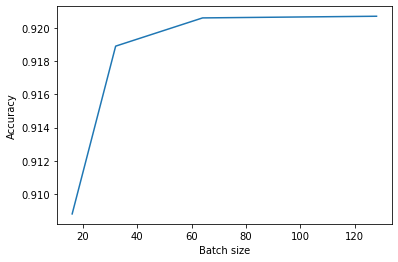

In [29]:
plt.plot(batch_sizes, b_acc)
plt.xlabel('Batch size')
plt.ylabel('Accuracy')

In [30]:
for ep in eps:
    model.fit(X_train, Y_train, batch_size=128, epochs=ep, validation_data=(X_test, Y_test))
    e_scores.append(model.evaluate(X_test, Y_test, verbose=0))

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0897 - accuracy: 0.9660 - val_loss: 0.2827 - val_accuracy: 0.9217
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0836 - accuracy: 0.9689 - val_loss: 0.2880 - val_accuracy: 0.9214
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0850 - accuracy: 0.9678 - val_loss: 0.2843 - val_accuracy: 0.9207
Epoch 4/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0843 - accuracy: 0.9678 - val_loss: 0.2856 - val_accuracy: 0.9210
Epoch 5/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0796 - accuracy: 0.9688 - val_loss: 0.2864 - val_accuracy: 0.9226
Epoch 6/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0840 - accuracy: 0.9675 - val_loss: 0.2987 - val_accuracy: 0.9187
Epoch 7/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0802 - accuracy: 0.9686 - val_loss: 0.2955 - val_accuracy:

Epoch 28/30
469/469 [==============================] - 29s 62ms/step - loss: 0.0645 - accuracy: 0.9765 - val_loss: 0.3359 - val_accuracy: 0.9225
Epoch 29/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0620 - accuracy: 0.9771 - val_loss: 0.3330 - val_accuracy: 0.9225
Epoch 30/30
469/469 [==============================] - 32s 68ms/step - loss: 0.0649 - accuracy: 0.9763 - val_loss: 0.3298 - val_accuracy: 0.9245
Epoch 1/40
469/469 [==============================] - 34s 72ms/step - loss: 0.0619 - accuracy: 0.9762 - val_loss: 0.3312 - val_accuracy: 0.9213
Epoch 2/40
469/469 [==============================] - 40s 85ms/step - loss: 0.0604 - accuracy: 0.9772 - val_loss: 0.3407 - val_accuracy: 0.9224
Epoch 3/40
469/469 [==============================] - 38s 81ms/step - loss: 0.0647 - accuracy: 0.9758 - val_loss: 0.3275 - val_accuracy: 0.9221
Epoch 4/40
469/469 [==============================] - 34s 73ms/step - loss: 0.0626 - accuracy: 0.9762 - val_loss: 0.3350 - val_accura

In [33]:
e_acc = [x[1] for x in e_scores]

Text(0, 0.5, 'Accuracy')

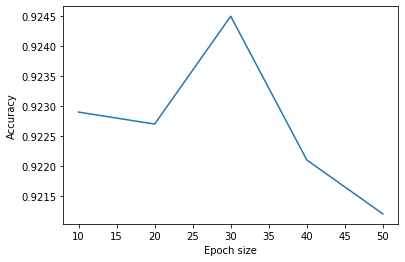

In [34]:
plt.plot(eps, e_acc)
plt.xlabel('Epoch size')
plt.ylabel('Accuracy')